In [1]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [2]:
X_train, y_train = load_mnist('.', kind='train')

In [3]:
X_train.shape

(60000, 784)

In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [6]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [7]:
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

In [8]:
np.unique(y_subset)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print(f'PCA done! Time elapsed: {time.time()-time_start} seconds')

PCA done! Time elapsed: 0.6234831809997559 seconds


In [10]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print(f'Variance explained per principal component: {pca.explained_variance_ratio_}')

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


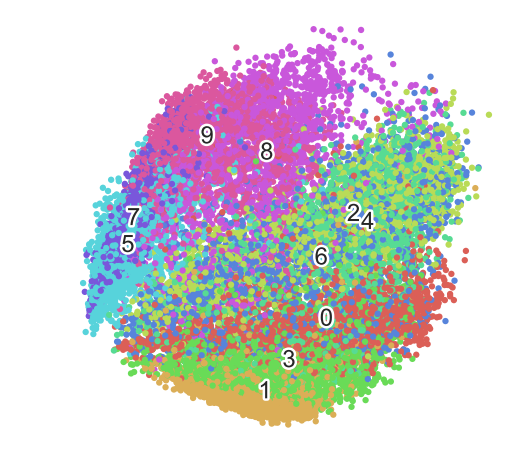

In [11]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

f, ax, sc, txts = fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output
f.show()

In [12]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(x_subset)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

t-SNE done! Time elapsed: 223.9706747531891 seconds


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


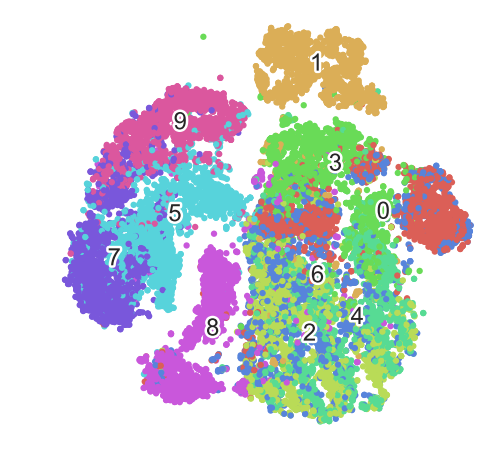

In [13]:
f, ax, sc, txts = fashion_scatter(fashion_tsne, y_subset)
f.show()

In [14]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print(f'PCA with 50 components done! Time elapsed: {time.time()-time_start} seconds')

print(f'Cumulative variance explained by 50 principal components: {np.sum(pca_50.explained_variance_ratio_)}')

PCA with 50 components done! Time elapsed: 1.1455249786376953 seconds
Cumulative variance explained by 50 principal components: 0.8624682420611026


In [15]:
import time
time_start = time.time()

# 这里直接应用 n_jobs=-1 参数，启用所有cpu进行计算
fashion_pca_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(pca_result_50)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

t-SNE done! Time elapsed: 93.07448196411133 seconds


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


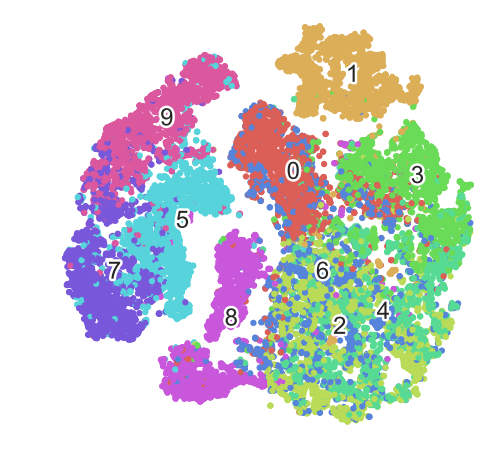

In [16]:
f, ax, sc, txts = fashion_scatter(fashion_pca_tsne, y_subset)
f.show()